Build a model that can rate the sentiment of a Tweet based on its content.

You'll build an NLP model to analyze Twitter sentiment about Apple and Google products. The dataset comes from CrowdFlower via data.world. Human raters rated the sentiment in over 9,000 Tweets as positive, negative, or neither.

Aim for a Proof of Concept
There are many approaches to NLP problems - start with something simple and iterate from there. For example, you could start by limiting your analysis to positive and negative Tweets only, allowing you to build a binary classifier. Then you could add in the neutral Tweets to build out a multiclass classifier. You may also consider using some of the more advanced NLP methods in the Mod 4 Appendix.

Evaluation
Evaluating multiclass classifiers can be trickier than binary classifiers because there are multiple ways to mis-classify an observation, and some errors are more problematic than others. Use the business problem that your NLP project sets out to solve to inform your choice of evaluation metrics.

Data: https://data.world/crowdflower/brands-and-product-emotions

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('../../data/judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
# rename columns
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df.head() #Sanity Check

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df_na_c2=df[df['Product'].isna()]
df_na_c2

,Tweet,Product,Sentiment
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [6]:
df_na_c2['Sentiment'].value_counts()

No emotion toward brand or product    5298
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: Sentiment, dtype: int64

In [7]:
df_nona_c2 = df[(df['Product'].isna())== False]
df_nona_c2

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [8]:
df_nona_c2['Product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: Product, dtype: int64

In [9]:
df_nona_c2['Sentiment'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: Sentiment, dtype: int64

In [10]:
df_nona_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      3291 non-null   object
 1   Product    3291 non-null   object
 2   Sentiment  3291 non-null   object
dtypes: object(3)
memory usage: 102.8+ KB


In [11]:
df['Sentiment'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Sentiment, dtype: int64

- if only use data directed to products, then not enough data

In [12]:
# nltk related imports
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [13]:
# set up tokenizer
tokenizer_tweet= TweetTokenizer(strip_handles=True)
# create stemmer object
stemmer = SnowballStemmer('english')

In [14]:
stopwords_list= stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def preprocessing(text, tokenizer, stopwords_list, stemmer):
    
    text=tokenizer.tokenize(text)
    text=[word for word in text if word not in stopwords_list]
    text=[stemmer.stem(word) for word in text]
    return text

In [16]:
# set up Tweet tokenizer
from nltk.tokenize import TweetTokenizer
tokenizer_tweet= TweetTokenizer(strip_handles=True)
sample_tweet=tokenizer_tweet.tokenize(df['Tweet'][5])
sample_tweet

['New',
 'iPad',
 'Apps',
 'For',
 '#SpeechTherapy',
 'And',
 'Communication',
 'Are',
 'Showcased',
 'At',
 'The',
 '#SXSW',
 'Conference',
 'http://ht.ly/49n4M',
 '#iear',
 '#edchat',
 '#asd']

In [17]:
# take out row with null values
df=df[df['Tweet'].isna()==False]

In [18]:
# import regular expression python library
import re
# add a hashtag column
df['hashtags'] = df['Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))
df

,Tweet,Product,Sentiment,hashtags
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[#RISE_Austin, #SXSW]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,[#SXSW]
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[#iPad, #SXSW]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,[#sxsw]
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,[#SXSW]
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,[#SXSW]
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,"[#sxsw, #google, #circles]"
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,"[#sxsw, #health2dev]"
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,[#SXSW]


In [19]:
import string

In [20]:
# original code from https://github.com/srobz/Classifying-a-Tweet-s-Sentiment-Based-on-its-Content/blob/main/Phase%204%20Project%20-%201%20-%20Data%20Cleaning.ipynb
df['clean'] = df['Tweet'] 

df['clean'] = df['clean'].str.lower() #Making everything lowercase

df['clean'] = df['clean'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x)) #Removing URLs with http/s

df['clean'] = df['clean'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x)) #Removing URLs with www

df['clean'] = df['clean'].apply(lambda x: re.sub(r'{link}', '', x)) #Removing {link} from tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r"\[video\]", '', x)) #Removing [video] from tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r'&[a-z]+;', '', x)) #Removing HTML reference characters

df['clean'] = df['clean'].apply(lambda x: re.sub(r"@[A-Za-z0-9]+", '', x)) #Removing all twitter handles from tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r"[^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*", '', x)) #Removing other characters

def remove_punctuation(text): #Function to remove punctuation from tweet
    punctuationfree = "".join([i for i in text if i not in string.punctuation]) #Removing punctuation from tweet
    return punctuationfree #Returning punctuation free tweet

df['clean'] = df['clean'].apply(lambda x: remove_punctuation(x)) #Applying function to tweets

df['clean'] = df['clean'].apply(lambda x: re.sub(r"[ ]{2,}", ' ', x)) #Removing extra spaces

In [21]:
df['preprocessed_text']=df['clean'].apply(lambda x:preprocessing(x, tokenizer_tweet,stopwords_list, stemmer))

In [22]:
df

,Tweet,Product,Sentiment,hashtags,clean,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[#RISE_Austin, #SXSW]",i have a 3g iphone after 3 hrs tweeting at ri...,"[3g, iphon, 3, hrs, tweet, riseaustin, dead, n..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,[#SXSW],know about awesome ipadiphone app that youll ...,"[know, awesom, ipadiphon, app, youll, like, ap..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[#iPad, #SXSW]",can not wait for ipad 2 also they should sale...,"[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,[#sxsw],i hope this years festival isnt as crashy as ...,"[hope, year, festiv, isnt, crashi, year, iphon..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,[#SXSW],great stuff on fri sxsw marissa mayer google ...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,[#SXSW],ipad everywhere sxsw,"[ipad, everywher, sxsw]"
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,"[#sxsw, #google, #circles]",wave buzz rt we interrupt your regularly sched...,"[wave, buzz, rt, interrupt, regular, schedul, ..."
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,"[#sxsw, #health2dev]",googles zeiger a physician never reported pote...,"[googl, zeiger, physician, never, report, pote..."
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,[#SXSW],some verizon iphone customers complained their...,"[verizon, iphon, custom, complain, time, fell,..."


In [23]:
# mapping sentiment column
df['Sentiment'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Sentiment, dtype: int64

In [24]:
# negative = 0, neutral/I can't tell = 1, positive =2 
dict_sent = {'No emotion toward brand or product':1, 
             'Positive emotion':2,
             'Negative emotion':0,
             "I can't tell": 1}
df['Sentiment'] = df['Sentiment'].map(dict_sent)

In [25]:
df['Sentiment']

0       0
1       2
2       2
3       0
4       2
       ..
9088    2
9089    1
9090    1
9091    1
9092    1
Name: Sentiment, Length: 9092, dtype: int64

In [26]:
# drop the product column because we want general sentiment to make it applicable to all tech products
df = df.drop('Product', axis=1)

In [27]:
df["preprocessed_text"] = df["preprocessed_text"].str.join(" ")

In [28]:
y = df['Sentiment']
X = df['preprocessed_text']

In [29]:
X

0       3g iphon 3 hrs tweet riseaustin dead need upgr...
1       know awesom ipadiphon app youll like appreci d...
2                              wait ipad 2 also sale sxsw
3        hope year festiv isnt crashi year iphon app sxsw
4       great stuff fri sxsw marissa mayer googl tim o...
                              ...                        
9088                                  ipad everywher sxsw
9089    wave buzz rt interrupt regular schedul sxsw ge...
9090    googl zeiger physician never report potenti ae...
9091    verizon iphon custom complain time fell back h...
9092                  rt googl test checkin offersat sxsw
Name: preprocessed_text, Length: 9092, dtype: object

In [30]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train_int, X_test, y_train_int, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_int, y_train_int, random_state=42)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tf_idf = TfidfVectorizer(max_features=200)


In [33]:
tf_idf.fit(X_train)

TfidfVectorizer(max_features=200)

In [34]:
X_train_vec=tf_idf.transform(X_train)
X_val_vec=tf_idf.transform(X_val)

In [35]:
X_train_vec

<5114x200 sparse matrix of type '<class 'numpy.float64'>'
	with 30910 stored elements in Compressed Sparse Row format>

In [36]:
print(X_train_vec)

  (0, 158)	0.12068241012040018
  (0, 141)	0.26823928538086256
  (0, 67)	0.277616086944836
  (0, 61)	0.6126233573240555
  (0, 49)	0.6790474004046667
  (1, 158)	0.16939050796926436
  (1, 82)	0.36611212699789764
  (1, 2)	0.9150239156847159
  (2, 158)	0.1202121022920098
  (2, 96)	0.698582425521933
  (2, 89)	0.6224394370761039
  (2, 83)	0.3318143944840412
  (3, 195)	0.4945505075997846
  (3, 158)	0.09551283653783296
  (3, 156)	0.26759583828285144
  (3, 82)	0.20643664252316607
  (3, 66)	0.46996563484054016
  (3, 31)	0.41164617485633603
  (3, 27)	0.43232590983315317
  (3, 10)	0.23419545240837672
  (4, 158)	0.08168752432663395
  (4, 83)	0.22547726813312738
  (4, 64)	0.8313275556498833
  (4, 49)	0.45963368633551294
  (4, 10)	0.20029607966064877
  :	:
  (5108, 13)	0.27055943482566625
  (5109, 169)	0.6144196609261703
  (5109, 158)	0.11927072888484758
  (5109, 57)	0.5032803374409173
  (5109, 17)	0.5957951623200741
  (5110, 158)	0.13144617995803512
  (5110, 99)	0.6467736657247374
  (5110, 86)	0.6954

In [37]:
tfidf_train_df=pd.DataFrame(X_train_vec.toarray(), 
                              columns=tf_idf.get_feature_names())

In [38]:
tfidf_val_df = pd.DataFrame(X_val_vec.toarray(), 
                              columns=tf_idf.get_feature_names())

In [39]:
tfidf_train_df

,10,2011,2s,6th,action,alreadi,also,android,anyon,app,...,way,web,week,well,win,work,world,would,year,your
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.915024,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.494551,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5110,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.481959,0.0
5112,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [40]:
X_train

5191    rt googl refriger magnet game everyon sxsw key...
3545                      fulli expect ipad shame 2s sxsw
2169             iphon batteri doesnt last long sxsw usag
1440    good work check latest stream appl store sxsw ...
7548    sxsw csr report janecek microsoft give chariti...
                              ...                        
3216    best thing abt sxsw 1 sherri patio plenti free...
2753                     love wave ipad webber japan sxsw
7835    itun free sxsw sampler featur select 23 year p...
3416                     mom ipad design boomer sxsw sxsw
3480    1230pm hilton 615ab sxsw rt go android develop...
Name: preprocessed_text, Length: 5114, dtype: object

### Modeling

In [41]:
# import stuff used for modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [42]:
# build an evaluation function 
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te, include_values=True, cmap=plt.cm.Blues)

Model 1: decision tree


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()

In [45]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

Accuracy Score:
Train - 0.6990614000782167
Test - 0.6334310850439883
  
Confusion matrix for test data


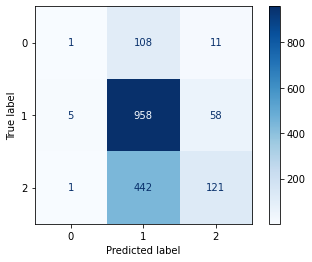

In [46]:
dt_grid_params = {'max_depth':[1,5,10,20,50], 'min_samples_split':[2,10,100]}
dt_grid = GridSearchCV(dt, dt_grid_params)
dt_output = dt_grid.fit(tfidf_train_df, y_train)
dt_output.best_params_
dt_best_model = dt_output.best_estimator_
cross_validate(dt_best_model, tfidf_train_df, y_train, return_train_score=True)
evaluate(dt_best_model, tfidf_train_df, y_train, tfidf_val_df, y_val)

In [59]:
dt_1=DecisionTreeClassifier()
dt_1.fit(tfidf_train_df, y_train)

DecisionTreeClassifier()

Accuracy Score:
Train - 0.959327336722722
Test - 0.5935483870967742
  
Confusion matrix for test data


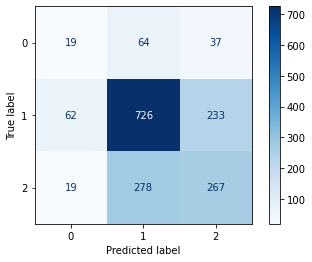

In [60]:
evaluate(dt_1, tfidf_train_df, y_train, tfidf_val_df, y_val)

Model 2: random forrest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

Accuracy Score:
Train - 0.7696519358623387
Test - 0.6457478005865103
  
Confusion matrix for test data


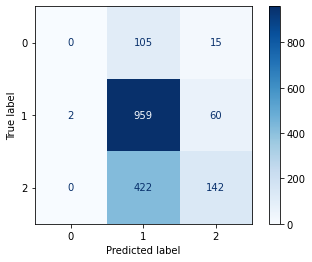

In [49]:
rfc_grid_params = {'max_depth':[1,5,10,20], 'min_samples_split':[2,10,100,500]}
rfc_grid = GridSearchCV(rfc, rfc_grid_params)
rfc_output = rfc_grid.fit(tfidf_train_df, y_train)
rfc_output.best_params_
rfc_best_model = rfc_output.best_estimator_
cross_validate(rfc_best_model, tfidf_train_df, y_train, return_train_score=True)
evaluate(rfc_best_model, tfidf_train_df, y_train, tfidf_val_df, y_val)

In [61]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(tfidf_train_df, y_train)

RandomForestClassifier()

Accuracy Score:
Train - 0.959327336722722
Test - 0.6334310850439883
  
Confusion matrix for test data


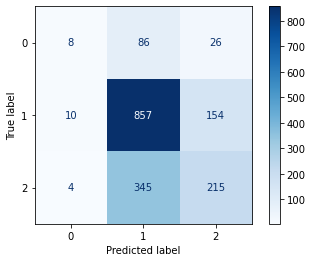

In [62]:
evaluate(rfc_1, tfidf_train_df, y_train, tfidf_val_df, y_val)

Model 3: naive bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
nb=MultinomialNB()

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Use

Accuracy Score:
Train - 0.6761830269847477
Test - 0.6304985337243402
  
Confusion matrix for test data


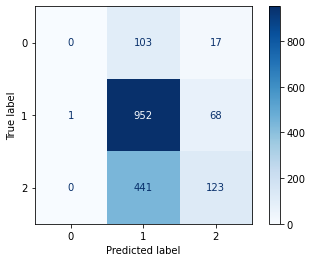

In [52]:
nb_grid_params = {'alpha':[0,0.25,0.5,1], 'fit_prior':[True,False]}
nb_grid = GridSearchCV(nb, nb_grid_params)
nb_output = nb_grid.fit(tfidf_train_df, y_train)
nb_output.best_params_
nb_best_model = nb_output.best_estimator_
cross_validate(nb_best_model, tfidf_train_df, y_train, return_train_score=True)
evaluate(nb_best_model, tfidf_train_df, y_train, tfidf_val_df, y_val)

Model 4: CatBoost

In [53]:
from catboost import CatBoostClassifier


In [54]:
cbc=CatBoostClassifier()

In [55]:
cbc.fit(tfidf_train_df, y_train)

Learning rate set to 0.085994
0:	learn: 1.0597806	total: 82.9ms	remaining: 1m 22s
1:	learn: 1.0266501	total: 93.6ms	remaining: 46.7s
2:	learn: 0.9992482	total: 103ms	remaining: 34.3s
3:	learn: 0.9742281	total: 113ms	remaining: 28.2s
4:	learn: 0.9536377	total: 123ms	remaining: 24.6s
5:	learn: 0.9355213	total: 134ms	remaining: 22.1s
6:	learn: 0.9196491	total: 144ms	remaining: 20.4s
7:	learn: 0.9046410	total: 153ms	remaining: 19s
8:	learn: 0.8932433	total: 162ms	remaining: 17.9s
9:	learn: 0.8815097	total: 172ms	remaining: 17s
10:	learn: 0.8713267	total: 182ms	remaining: 16.4s
11:	learn: 0.8622988	total: 194ms	remaining: 16s
12:	learn: 0.8542084	total: 206ms	remaining: 15.7s
13:	learn: 0.8469756	total: 219ms	remaining: 15.4s
14:	learn: 0.8403790	total: 228ms	remaining: 15s
15:	learn: 0.8342794	total: 238ms	remaining: 14.7s
16:	learn: 0.8295204	total: 248ms	remaining: 14.4s
17:	learn: 0.8243237	total: 258ms	remaining: 14.1s
18:	learn: 0.8195511	total: 267ms	remaining: 13.8s
19:	learn: 0.815

165:	learn: 0.6983392	total: 1.81s	remaining: 9.12s
166:	learn: 0.6978508	total: 1.83s	remaining: 9.12s
167:	learn: 0.6975443	total: 1.84s	remaining: 9.11s
168:	learn: 0.6970876	total: 1.85s	remaining: 9.09s
169:	learn: 0.6967383	total: 1.86s	remaining: 9.08s
170:	learn: 0.6963097	total: 1.87s	remaining: 9.08s
171:	learn: 0.6957494	total: 1.88s	remaining: 9.06s
172:	learn: 0.6954667	total: 1.89s	remaining: 9.05s
173:	learn: 0.6949016	total: 1.9s	remaining: 9.04s
174:	learn: 0.6945676	total: 1.91s	remaining: 9.02s
175:	learn: 0.6943829	total: 1.92s	remaining: 9.01s
176:	learn: 0.6937984	total: 1.94s	remaining: 9s
177:	learn: 0.6931386	total: 1.94s	remaining: 8.98s
178:	learn: 0.6925900	total: 1.96s	remaining: 8.97s
179:	learn: 0.6922779	total: 1.96s	remaining: 8.95s
180:	learn: 0.6919067	total: 1.98s	remaining: 8.94s
181:	learn: 0.6913725	total: 1.99s	remaining: 8.92s
182:	learn: 0.6908340	total: 2s	remaining: 8.91s
183:	learn: 0.6904824	total: 2s	remaining: 8.89s
184:	learn: 0.6897398	

326:	learn: 0.6432278	total: 3.43s	remaining: 7.06s
327:	learn: 0.6429791	total: 3.44s	remaining: 7.05s
328:	learn: 0.6427786	total: 3.45s	remaining: 7.04s
329:	learn: 0.6426256	total: 3.46s	remaining: 7.03s
330:	learn: 0.6422503	total: 3.47s	remaining: 7.02s
331:	learn: 0.6419418	total: 3.48s	remaining: 7.01s
332:	learn: 0.6418181	total: 3.49s	remaining: 7s
333:	learn: 0.6415625	total: 3.5s	remaining: 6.99s
334:	learn: 0.6412714	total: 3.51s	remaining: 6.97s
335:	learn: 0.6410662	total: 3.52s	remaining: 6.96s
336:	learn: 0.6408279	total: 3.53s	remaining: 6.95s
337:	learn: 0.6405705	total: 3.54s	remaining: 6.94s
338:	learn: 0.6403246	total: 3.55s	remaining: 6.92s
339:	learn: 0.6400898	total: 3.56s	remaining: 6.91s
340:	learn: 0.6399066	total: 3.57s	remaining: 6.9s
341:	learn: 0.6396595	total: 3.58s	remaining: 6.89s
342:	learn: 0.6394003	total: 3.59s	remaining: 6.88s
343:	learn: 0.6391305	total: 3.6s	remaining: 6.87s
344:	learn: 0.6389325	total: 3.61s	remaining: 6.85s
345:	learn: 0.6386

487:	learn: 0.6074472	total: 5.07s	remaining: 5.32s
488:	learn: 0.6073441	total: 5.08s	remaining: 5.31s
489:	learn: 0.6069791	total: 5.09s	remaining: 5.3s
490:	learn: 0.6068656	total: 5.1s	remaining: 5.29s
491:	learn: 0.6067379	total: 5.11s	remaining: 5.28s
492:	learn: 0.6065697	total: 5.12s	remaining: 5.26s
493:	learn: 0.6059955	total: 5.13s	remaining: 5.25s
494:	learn: 0.6059087	total: 5.14s	remaining: 5.24s
495:	learn: 0.6057068	total: 5.16s	remaining: 5.24s
496:	learn: 0.6055215	total: 5.18s	remaining: 5.25s
497:	learn: 0.6054240	total: 5.2s	remaining: 5.24s
498:	learn: 0.6052919	total: 5.21s	remaining: 5.23s
499:	learn: 0.6052000	total: 5.22s	remaining: 5.22s
500:	learn: 0.6048782	total: 5.23s	remaining: 5.21s
501:	learn: 0.6047605	total: 5.24s	remaining: 5.2s
502:	learn: 0.6045910	total: 5.25s	remaining: 5.18s
503:	learn: 0.6043273	total: 5.26s	remaining: 5.17s
504:	learn: 0.6040303	total: 5.27s	remaining: 5.16s
505:	learn: 0.6038271	total: 5.28s	remaining: 5.15s
506:	learn: 0.60

662:	learn: 0.5775162	total: 6.91s	remaining: 3.51s
663:	learn: 0.5773809	total: 6.92s	remaining: 3.5s
664:	learn: 0.5772855	total: 6.93s	remaining: 3.49s
665:	learn: 0.5770581	total: 6.95s	remaining: 3.48s
666:	learn: 0.5768098	total: 6.96s	remaining: 3.47s
667:	learn: 0.5767637	total: 6.97s	remaining: 3.46s
668:	learn: 0.5766369	total: 6.98s	remaining: 3.45s
669:	learn: 0.5765996	total: 6.99s	remaining: 3.44s
670:	learn: 0.5764922	total: 7s	remaining: 3.43s
671:	learn: 0.5764244	total: 7.01s	remaining: 3.42s
672:	learn: 0.5763513	total: 7.02s	remaining: 3.41s
673:	learn: 0.5762006	total: 7.03s	remaining: 3.4s
674:	learn: 0.5760835	total: 7.04s	remaining: 3.39s
675:	learn: 0.5759513	total: 7.04s	remaining: 3.38s
676:	learn: 0.5758219	total: 7.05s	remaining: 3.37s
677:	learn: 0.5756760	total: 7.06s	remaining: 3.35s
678:	learn: 0.5755285	total: 7.07s	remaining: 3.34s
679:	learn: 0.5753518	total: 7.08s	remaining: 3.33s
680:	learn: 0.5750523	total: 7.09s	remaining: 3.32s
681:	learn: 0.574

823:	learn: 0.5539230	total: 8.54s	remaining: 1.82s
824:	learn: 0.5537456	total: 8.55s	remaining: 1.81s
825:	learn: 0.5536471	total: 8.56s	remaining: 1.8s
826:	learn: 0.5533856	total: 8.57s	remaining: 1.79s
827:	learn: 0.5532151	total: 8.58s	remaining: 1.78s
828:	learn: 0.5530645	total: 8.59s	remaining: 1.77s
829:	learn: 0.5529157	total: 8.6s	remaining: 1.76s
830:	learn: 0.5527233	total: 8.61s	remaining: 1.75s
831:	learn: 0.5524145	total: 8.62s	remaining: 1.74s
832:	learn: 0.5522316	total: 8.63s	remaining: 1.73s
833:	learn: 0.5521216	total: 8.64s	remaining: 1.72s
834:	learn: 0.5519924	total: 8.65s	remaining: 1.71s
835:	learn: 0.5517865	total: 8.65s	remaining: 1.7s
836:	learn: 0.5515603	total: 8.67s	remaining: 1.69s
837:	learn: 0.5514887	total: 8.68s	remaining: 1.68s
838:	learn: 0.5513965	total: 8.69s	remaining: 1.67s
839:	learn: 0.5512084	total: 8.7s	remaining: 1.66s
840:	learn: 0.5510510	total: 8.71s	remaining: 1.65s
841:	learn: 0.5508941	total: 8.72s	remaining: 1.64s
842:	learn: 0.55

998:	learn: 0.5312873	total: 10.4s	remaining: 10.4ms
999:	learn: 0.5310898	total: 10.4s	remaining: 0us


Accuracy Score:
Train - 0.7937035588580368
Test - 0.6434017595307918
  
Confusion matrix for test data


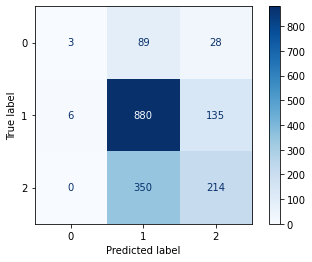

In [56]:
evaluate(cbc,tfidf_train_df,y_train,tfidf_val_df,y_val)

Learning rate set to 0.085994
0:	learn: 1.0597806	total: 33.4ms	remaining: 33.4s
1:	learn: 1.0266501	total: 44.4ms	remaining: 22.2s
2:	learn: 0.9992482	total: 54.1ms	remaining: 18s
3:	learn: 0.9742281	total: 63.5ms	remaining: 15.8s
4:	learn: 0.9536377	total: 73.5ms	remaining: 14.6s
5:	learn: 0.9355213	total: 82.7ms	remaining: 13.7s
6:	learn: 0.9196491	total: 92.6ms	remaining: 13.1s
7:	learn: 0.9046410	total: 104ms	remaining: 12.9s
8:	learn: 0.8932433	total: 114ms	remaining: 12.6s
9:	learn: 0.8815097	total: 125ms	remaining: 12.3s
10:	learn: 0.8713267	total: 138ms	remaining: 12.4s
11:	learn: 0.8622988	total: 150ms	remaining: 12.3s
12:	learn: 0.8542084	total: 160ms	remaining: 12.2s
13:	learn: 0.8469756	total: 171ms	remaining: 12.1s
14:	learn: 0.8403790	total: 182ms	remaining: 12s
15:	learn: 0.8342794	total: 193ms	remaining: 11.9s
16:	learn: 0.8295204	total: 205ms	remaining: 11.9s
17:	learn: 0.8243237	total: 219ms	remaining: 11.9s
18:	learn: 0.8195511	total: 240ms	remaining: 12.4s
19:	lear

164:	learn: 0.6986890	total: 1.8s	remaining: 9.12s
165:	learn: 0.6983392	total: 1.81s	remaining: 9.11s
166:	learn: 0.6978508	total: 1.82s	remaining: 9.1s
167:	learn: 0.6975443	total: 1.83s	remaining: 9.09s
168:	learn: 0.6970876	total: 1.84s	remaining: 9.07s
169:	learn: 0.6967383	total: 1.85s	remaining: 9.05s
170:	learn: 0.6963097	total: 1.86s	remaining: 9.03s
171:	learn: 0.6957494	total: 1.87s	remaining: 9.02s
172:	learn: 0.6954667	total: 1.88s	remaining: 9s
173:	learn: 0.6949016	total: 1.89s	remaining: 8.99s
174:	learn: 0.6945676	total: 1.9s	remaining: 8.97s
175:	learn: 0.6943829	total: 1.91s	remaining: 8.96s
176:	learn: 0.6937984	total: 1.92s	remaining: 8.94s
177:	learn: 0.6931386	total: 1.93s	remaining: 8.93s
178:	learn: 0.6925900	total: 1.94s	remaining: 8.92s
179:	learn: 0.6922779	total: 1.95s	remaining: 8.9s
180:	learn: 0.6919067	total: 1.96s	remaining: 8.88s
181:	learn: 0.6913725	total: 1.97s	remaining: 8.87s
182:	learn: 0.6908340	total: 1.98s	remaining: 8.85s
183:	learn: 0.69048

340:	learn: 0.6399066	total: 3.64s	remaining: 7.04s
341:	learn: 0.6396595	total: 3.65s	remaining: 7.03s
342:	learn: 0.6394003	total: 3.66s	remaining: 7.01s
343:	learn: 0.6391305	total: 3.67s	remaining: 7s
344:	learn: 0.6389325	total: 3.68s	remaining: 6.99s
345:	learn: 0.6386579	total: 3.69s	remaining: 6.98s
346:	learn: 0.6384666	total: 3.7s	remaining: 6.97s
347:	learn: 0.6382344	total: 3.71s	remaining: 6.95s
348:	learn: 0.6380674	total: 3.72s	remaining: 6.94s
349:	learn: 0.6376549	total: 3.73s	remaining: 6.93s
350:	learn: 0.6375185	total: 3.74s	remaining: 6.92s
351:	learn: 0.6374144	total: 3.75s	remaining: 6.91s
352:	learn: 0.6373100	total: 3.76s	remaining: 6.9s
353:	learn: 0.6368870	total: 3.77s	remaining: 6.88s
354:	learn: 0.6365638	total: 3.78s	remaining: 6.87s
355:	learn: 0.6363479	total: 3.79s	remaining: 6.86s
356:	learn: 0.6359918	total: 3.8s	remaining: 6.85s
357:	learn: 0.6356763	total: 3.81s	remaining: 6.84s
358:	learn: 0.6353576	total: 3.82s	remaining: 6.83s
359:	learn: 0.6351

506:	learn: 0.6035913	total: 5.45s	remaining: 5.3s
507:	learn: 0.6034622	total: 5.46s	remaining: 5.29s
508:	learn: 0.6032185	total: 5.48s	remaining: 5.28s
509:	learn: 0.6029232	total: 5.49s	remaining: 5.27s
510:	learn: 0.6027999	total: 5.5s	remaining: 5.26s
511:	learn: 0.6025864	total: 5.51s	remaining: 5.25s
512:	learn: 0.6024612	total: 5.52s	remaining: 5.24s
513:	learn: 0.6022822	total: 5.53s	remaining: 5.23s
514:	learn: 0.6020406	total: 5.54s	remaining: 5.22s
515:	learn: 0.6018997	total: 5.55s	remaining: 5.21s
516:	learn: 0.6016316	total: 5.56s	remaining: 5.2s
517:	learn: 0.6014996	total: 5.58s	remaining: 5.19s
518:	learn: 0.6013511	total: 5.59s	remaining: 5.18s
519:	learn: 0.6012329	total: 5.59s	remaining: 5.17s
520:	learn: 0.6009816	total: 5.61s	remaining: 5.15s
521:	learn: 0.6006021	total: 5.62s	remaining: 5.15s
522:	learn: 0.6003398	total: 5.63s	remaining: 5.14s
523:	learn: 0.6002845	total: 5.65s	remaining: 5.13s
524:	learn: 0.6000645	total: 5.67s	remaining: 5.13s
525:	learn: 0.5

668:	learn: 0.5766369	total: 7.3s	remaining: 3.61s
669:	learn: 0.5765996	total: 7.31s	remaining: 3.6s
670:	learn: 0.5764922	total: 7.32s	remaining: 3.59s
671:	learn: 0.5764244	total: 7.33s	remaining: 3.58s
672:	learn: 0.5763513	total: 7.34s	remaining: 3.57s
673:	learn: 0.5762006	total: 7.36s	remaining: 3.56s
674:	learn: 0.5760835	total: 7.36s	remaining: 3.54s
675:	learn: 0.5759513	total: 7.38s	remaining: 3.53s
676:	learn: 0.5758219	total: 7.38s	remaining: 3.52s
677:	learn: 0.5756760	total: 7.39s	remaining: 3.51s
678:	learn: 0.5755285	total: 7.41s	remaining: 3.5s
679:	learn: 0.5753518	total: 7.42s	remaining: 3.49s
680:	learn: 0.5750523	total: 7.43s	remaining: 3.48s
681:	learn: 0.5749672	total: 7.44s	remaining: 3.47s
682:	learn: 0.5747107	total: 7.45s	remaining: 3.46s
683:	learn: 0.5745186	total: 7.46s	remaining: 3.44s
684:	learn: 0.5742458	total: 7.47s	remaining: 3.44s
685:	learn: 0.5741108	total: 7.53s	remaining: 3.45s
686:	learn: 0.5739711	total: 7.55s	remaining: 3.44s
687:	learn: 0.5

843:	learn: 0.5505891	total: 9.34s	remaining: 1.73s
844:	learn: 0.5504617	total: 9.36s	remaining: 1.72s
845:	learn: 0.5503015	total: 9.37s	remaining: 1.71s
846:	learn: 0.5501814	total: 9.38s	remaining: 1.69s
847:	learn: 0.5500840	total: 9.39s	remaining: 1.68s
848:	learn: 0.5499482	total: 9.4s	remaining: 1.67s
849:	learn: 0.5497901	total: 9.41s	remaining: 1.66s
850:	learn: 0.5496912	total: 9.43s	remaining: 1.65s
851:	learn: 0.5495435	total: 9.44s	remaining: 1.64s
852:	learn: 0.5493864	total: 9.45s	remaining: 1.63s
853:	learn: 0.5492140	total: 9.46s	remaining: 1.62s
854:	learn: 0.5490133	total: 9.47s	remaining: 1.6s
855:	learn: 0.5489279	total: 9.48s	remaining: 1.59s
856:	learn: 0.5487549	total: 9.49s	remaining: 1.58s
857:	learn: 0.5486880	total: 9.5s	remaining: 1.57s
858:	learn: 0.5485190	total: 9.51s	remaining: 1.56s
859:	learn: 0.5484074	total: 9.52s	remaining: 1.55s
860:	learn: 0.5483659	total: 9.53s	remaining: 1.54s
861:	learn: 0.5482458	total: 9.54s	remaining: 1.53s
862:	learn: 0.5

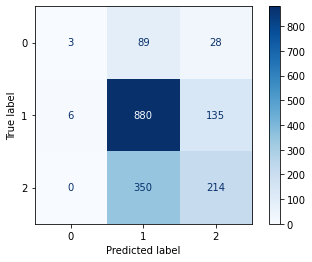

In [57]:
cbc_iter=CatBoostClassifier(od_type='Iter')
cbc_iter.fit(tfidf_train_df,y_train)
evaluate(cbc_iter,tfidf_train_df,y_train,tfidf_val_df,y_val)

Learning rate set to 0.085994
0:	learn: 1.0597806	total: 28.8ms	remaining: 28.7s
1:	learn: 1.0266501	total: 42.4ms	remaining: 21.2s
2:	learn: 0.9992482	total: 55ms	remaining: 18.3s
3:	learn: 0.9742281	total: 65.9ms	remaining: 16.4s
4:	learn: 0.9536377	total: 76.5ms	remaining: 15.2s
5:	learn: 0.9355213	total: 86ms	remaining: 14.3s
6:	learn: 0.9196491	total: 95.7ms	remaining: 13.6s
7:	learn: 0.9046410	total: 106ms	remaining: 13.1s
8:	learn: 0.8932433	total: 116ms	remaining: 12.7s
9:	learn: 0.8815097	total: 125ms	remaining: 12.4s
10:	learn: 0.8713267	total: 136ms	remaining: 12.2s
11:	learn: 0.8622988	total: 145ms	remaining: 12s
12:	learn: 0.8542084	total: 156ms	remaining: 11.8s
13:	learn: 0.8469756	total: 166ms	remaining: 11.7s
14:	learn: 0.8403790	total: 177ms	remaining: 11.6s
15:	learn: 0.8342794	total: 189ms	remaining: 11.6s
16:	learn: 0.8295204	total: 200ms	remaining: 11.6s
17:	learn: 0.8243237	total: 212ms	remaining: 11.6s
18:	learn: 0.8195511	total: 229ms	remaining: 11.8s
19:	learn:

171:	learn: 0.6957494	total: 1.82s	remaining: 8.78s
172:	learn: 0.6954667	total: 1.83s	remaining: 8.78s
173:	learn: 0.6949016	total: 1.85s	remaining: 8.76s
174:	learn: 0.6945676	total: 1.86s	remaining: 8.76s
175:	learn: 0.6943829	total: 1.87s	remaining: 8.75s
176:	learn: 0.6937984	total: 1.88s	remaining: 8.73s
177:	learn: 0.6931386	total: 1.89s	remaining: 8.72s
178:	learn: 0.6925900	total: 1.9s	remaining: 8.72s
179:	learn: 0.6922779	total: 1.91s	remaining: 8.72s
180:	learn: 0.6919067	total: 1.93s	remaining: 8.71s
181:	learn: 0.6913725	total: 1.94s	remaining: 8.71s
182:	learn: 0.6908340	total: 1.95s	remaining: 8.7s
183:	learn: 0.6904824	total: 1.96s	remaining: 8.69s
184:	learn: 0.6897398	total: 1.97s	remaining: 8.67s
185:	learn: 0.6894843	total: 1.98s	remaining: 8.66s
186:	learn: 0.6889783	total: 1.99s	remaining: 8.65s
187:	learn: 0.6884434	total: 2s	remaining: 8.64s
188:	learn: 0.6881716	total: 2.01s	remaining: 8.62s
189:	learn: 0.6875691	total: 2.02s	remaining: 8.61s
190:	learn: 0.687

346:	learn: 0.6384666	total: 3.66s	remaining: 6.89s
347:	learn: 0.6382344	total: 3.67s	remaining: 6.88s
348:	learn: 0.6380674	total: 3.69s	remaining: 6.88s
349:	learn: 0.6376549	total: 3.7s	remaining: 6.87s
350:	learn: 0.6375185	total: 3.71s	remaining: 6.86s
351:	learn: 0.6374144	total: 3.72s	remaining: 6.85s
352:	learn: 0.6373100	total: 3.73s	remaining: 6.84s
353:	learn: 0.6368870	total: 3.74s	remaining: 6.83s
354:	learn: 0.6365638	total: 3.75s	remaining: 6.82s
355:	learn: 0.6363479	total: 3.76s	remaining: 6.8s
356:	learn: 0.6359918	total: 3.77s	remaining: 6.79s
357:	learn: 0.6356763	total: 3.78s	remaining: 6.78s
358:	learn: 0.6353576	total: 3.79s	remaining: 6.77s
359:	learn: 0.6351914	total: 3.8s	remaining: 6.75s
360:	learn: 0.6350675	total: 3.81s	remaining: 6.74s
361:	learn: 0.6349979	total: 3.82s	remaining: 6.73s
362:	learn: 0.6349014	total: 3.83s	remaining: 6.72s
363:	learn: 0.6345637	total: 3.84s	remaining: 6.71s
364:	learn: 0.6343615	total: 3.85s	remaining: 6.69s
365:	learn: 0.6

509:	learn: 0.6029232	total: 5.3s	remaining: 5.1s
510:	learn: 0.6027999	total: 5.32s	remaining: 5.09s
511:	learn: 0.6025864	total: 5.33s	remaining: 5.08s
512:	learn: 0.6024612	total: 5.34s	remaining: 5.07s
513:	learn: 0.6022822	total: 5.35s	remaining: 5.06s
514:	learn: 0.6020406	total: 5.36s	remaining: 5.04s
515:	learn: 0.6018997	total: 5.37s	remaining: 5.03s
516:	learn: 0.6016316	total: 5.38s	remaining: 5.02s
517:	learn: 0.6014996	total: 5.39s	remaining: 5.01s
518:	learn: 0.6013511	total: 5.39s	remaining: 5s
519:	learn: 0.6012329	total: 5.41s	remaining: 4.99s
520:	learn: 0.6009816	total: 5.42s	remaining: 4.98s
521:	learn: 0.6006021	total: 5.42s	remaining: 4.97s
522:	learn: 0.6003398	total: 5.43s	remaining: 4.96s
523:	learn: 0.6002845	total: 5.44s	remaining: 4.95s
524:	learn: 0.6000645	total: 5.45s	remaining: 4.93s
525:	learn: 0.5998859	total: 5.46s	remaining: 4.92s
526:	learn: 0.5996642	total: 5.47s	remaining: 4.91s
527:	learn: 0.5995396	total: 5.48s	remaining: 4.9s
528:	learn: 0.5994

682:	learn: 0.5747107	total: 7.13s	remaining: 3.31s
683:	learn: 0.5745186	total: 7.15s	remaining: 3.3s
684:	learn: 0.5742458	total: 7.16s	remaining: 3.29s
685:	learn: 0.5741108	total: 7.17s	remaining: 3.28s
686:	learn: 0.5739711	total: 7.18s	remaining: 3.27s
687:	learn: 0.5737857	total: 7.19s	remaining: 3.26s
688:	learn: 0.5736201	total: 7.2s	remaining: 3.25s
689:	learn: 0.5734783	total: 7.21s	remaining: 3.24s
690:	learn: 0.5731920	total: 7.22s	remaining: 3.23s
691:	learn: 0.5730614	total: 7.23s	remaining: 3.22s
692:	learn: 0.5729349	total: 7.25s	remaining: 3.21s
693:	learn: 0.5727391	total: 7.26s	remaining: 3.2s
694:	learn: 0.5725740	total: 7.27s	remaining: 3.19s
695:	learn: 0.5725374	total: 7.28s	remaining: 3.18s
696:	learn: 0.5723568	total: 7.29s	remaining: 3.17s
697:	learn: 0.5722101	total: 7.3s	remaining: 3.16s
698:	learn: 0.5720185	total: 7.31s	remaining: 3.15s
699:	learn: 0.5718641	total: 7.32s	remaining: 3.14s
700:	learn: 0.5717212	total: 7.33s	remaining: 3.13s
701:	learn: 0.57

853:	learn: 0.5492140	total: 8.96s	remaining: 1.53s
854:	learn: 0.5490133	total: 8.98s	remaining: 1.52s
855:	learn: 0.5489279	total: 8.99s	remaining: 1.51s
856:	learn: 0.5487549	total: 9s	remaining: 1.5s
857:	learn: 0.5486880	total: 9.01s	remaining: 1.49s
858:	learn: 0.5485190	total: 9.02s	remaining: 1.48s
859:	learn: 0.5484074	total: 9.03s	remaining: 1.47s
860:	learn: 0.5483659	total: 9.04s	remaining: 1.46s
861:	learn: 0.5482458	total: 9.05s	remaining: 1.45s
862:	learn: 0.5481670	total: 9.06s	remaining: 1.44s
863:	learn: 0.5479298	total: 9.07s	remaining: 1.43s
864:	learn: 0.5475461	total: 9.08s	remaining: 1.42s
865:	learn: 0.5473802	total: 9.09s	remaining: 1.41s
866:	learn: 0.5472806	total: 9.1s	remaining: 1.4s
867:	learn: 0.5471390	total: 9.11s	remaining: 1.39s
868:	learn: 0.5470842	total: 9.12s	remaining: 1.38s
869:	learn: 0.5470102	total: 9.13s	remaining: 1.36s
870:	learn: 0.5468986	total: 9.14s	remaining: 1.35s
871:	learn: 0.5466538	total: 9.15s	remaining: 1.34s
872:	learn: 0.5465

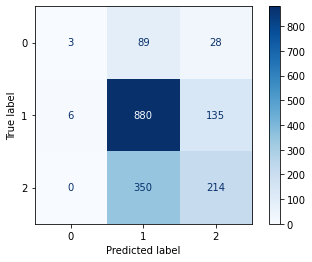

In [58]:
cbc_itd=CatBoostClassifier(od_type='IncToDec')
cbc_itd.fit(tfidf_train_df,y_train)
evaluate(cbc_itd,tfidf_train_df,y_train,tfidf_val_df,y_val)